#Financial development of the Wikimedia Foundation (in US$), 2003–2022

Financial data has been web scraped from https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics Wikipedia page using Python.

In [1]:
 import requests
from bs4 import BeautifulSoup

# Make an HTTP GET request to the Wikipedia page
url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element with the specified class
    info_box = soup.find("table", class_="wikitable sortable")

    if info_box is not None:
        # Create empty lists to store the table data
        headers = []
        data = []

        # Extract column headers
        header_row = info_box.find("tr")
        if header_row:
            header_cells = header_row.find_all(["th", "td"])
            headers = [cell.get_text(strip=True) for cell in header_cells]

        # Extract table rows
        rows = info_box.find_all("tr")
        for row in rows:
            row_data = [cell.get_text(strip=True) for cell in row.find_all(["th", "td"])]
            data.append(row_data)

        # Print the headers and data as a table
        print("Headers:", headers)
        for row in data:
            print("Row:", row)
    else:
        print("Table not found on the page.")
else:
    print("Failed to retrieve the web page. Status code:", response.status_code)


Headers: ['Year', 'Source', 'Revenue', 'Expenses', 'Asset rise', 'Total assets']
Row: ['Year', 'Source', 'Revenue', 'Expenses', 'Asset rise', 'Total assets']
Row: ['2021/22', 'PDF', '$ 154,686,521', '$ 145,970,915', '$ 8,173,996', '$ 239,351,532']
Row: ['2020/21', 'PDF', '$ 162,886,686', '$ 111,839,819', '$ 50,861,811', '$ 231,177,536']
Row: ['2019/20', 'PDF', '$ 129,234,327', '$ 112,489,397', '$ 14,674,300', '$ 180,315,725']
Row: ['2018/19', 'PDF', '$ 120,067,266', '$ 91,414,010', '$ 30,691,855', '$ 165,641,425']
Row: ['2017/18', 'PDF', '$ 104,505,783', '$ 81,442,265', '$ 21,619,373', '$ 134,949,570']
Row: ['2016/17', 'PDF', '$ 91,242,418', '$ 69,136,758', '$ 21,547,402', '$ 113,330,197']
Row: ['2015/16', 'PDF', '$ 81,862,724', '$ 65,947,465', '$ 13,962,497', '$ 91,782,795']
Row: ['2014/15', 'PDF', '$ 75,797,223', '$ 52,596,782', '$ 24,345,277', '$ 77,820,298']
Row: ['2013/14', 'PDF', '$ 52,465,287', '$ 45,900,745', '$ 8,285,897', '$ 53,475,021']
Row: ['2012/13', 'PDF', '$ 48,635,408'

In [2]:
import pandas as pd

In [3]:
# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Display the first few rows
print(df.head())

      Year  Source        Revenue       Expenses    Asset rise   Total assets
0     Year  Source        Revenue       Expenses    Asset rise   Total assets
1  2021/22     PDF  $ 154,686,521  $ 145,970,915   $ 8,173,996  $ 239,351,532
2  2020/21     PDF  $ 162,886,686  $ 111,839,819  $ 50,861,811  $ 231,177,536
3  2019/20     PDF  $ 129,234,327  $ 112,489,397  $ 14,674,300  $ 180,315,725
4  2018/19     PDF  $ 120,067,266   $ 91,414,010  $ 30,691,855  $ 165,641,425


In [4]:
# Delete the first row (index 0)
df = df.drop(0)

# Reset the index to start from 0
df = df.reset_index(drop=True)

# Display the DataFrame without the first row
print(df)

       Year Source        Revenue       Expenses    Asset rise   Total assets
0   2021/22    PDF  $ 154,686,521  $ 145,970,915   $ 8,173,996  $ 239,351,532
1   2020/21    PDF  $ 162,886,686  $ 111,839,819  $ 50,861,811  $ 231,177,536
2   2019/20    PDF  $ 129,234,327  $ 112,489,397  $ 14,674,300  $ 180,315,725
3   2018/19    PDF  $ 120,067,266   $ 91,414,010  $ 30,691,855  $ 165,641,425
4   2017/18    PDF  $ 104,505,783   $ 81,442,265  $ 21,619,373  $ 134,949,570
5   2016/17    PDF   $ 91,242,418   $ 69,136,758  $ 21,547,402  $ 113,330,197
6   2015/16    PDF   $ 81,862,724   $ 65,947,465  $ 13,962,497   $ 91,782,795
7   2014/15    PDF   $ 75,797,223   $ 52,596,782  $ 24,345,277   $ 77,820,298
8   2013/14    PDF   $ 52,465,287   $ 45,900,745   $ 8,285,897   $ 53,475,021
9   2012/13    PDF   $ 48,635,408   $ 35,704,796  $ 10,260,066   $ 45,189,124
10  2011/12    PDF   $ 38,479,665   $ 29,260,652  $ 10,736,914   $ 34,929,058
11  2010/11    PDF   $ 24,785,092   $ 17,889,794   $ 9,649,413  

In [5]:
# Delete the 'Source' column
df = df.drop('Source', axis=1)

# Display the DataFrame without the 'Source' column
print(df)

       Year        Revenue       Expenses    Asset rise   Total assets
0   2021/22  $ 154,686,521  $ 145,970,915   $ 8,173,996  $ 239,351,532
1   2020/21  $ 162,886,686  $ 111,839,819  $ 50,861,811  $ 231,177,536
2   2019/20  $ 129,234,327  $ 112,489,397  $ 14,674,300  $ 180,315,725
3   2018/19  $ 120,067,266   $ 91,414,010  $ 30,691,855  $ 165,641,425
4   2017/18  $ 104,505,783   $ 81,442,265  $ 21,619,373  $ 134,949,570
5   2016/17   $ 91,242,418   $ 69,136,758  $ 21,547,402  $ 113,330,197
6   2015/16   $ 81,862,724   $ 65,947,465  $ 13,962,497   $ 91,782,795
7   2014/15   $ 75,797,223   $ 52,596,782  $ 24,345,277   $ 77,820,298
8   2013/14   $ 52,465,287   $ 45,900,745   $ 8,285,897   $ 53,475,021
9   2012/13   $ 48,635,408   $ 35,704,796  $ 10,260,066   $ 45,189,124
10  2011/12   $ 38,479,665   $ 29,260,652  $ 10,736,914   $ 34,929,058
11  2010/11   $ 24,785,092   $ 17,889,794   $ 9,649,413   $ 24,192,144
12  2009/10   $ 17,979,312   $ 10,266,793   $ 6,310,964   $ 14,542,731
13  20

In [6]:
print("Data information:")
df.info()


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          19 non-null     object
 1   Revenue       19 non-null     object
 2   Expenses      19 non-null     object
 3   Asset rise    19 non-null     object
 4   Total assets  19 non-null     object
dtypes: object(5)
memory usage: 888.0+ bytes


In [7]:
# Remove $ sign
for col in df.columns:
    if col != 'Year':
        df[col] = df[col].replace('\$', '', regex=True)
    
print(df)



       Year       Revenue      Expenses   Asset rise  Total assets
0   2021/22   154,686,521   145,970,915    8,173,996   239,351,532
1   2020/21   162,886,686   111,839,819   50,861,811   231,177,536
2   2019/20   129,234,327   112,489,397   14,674,300   180,315,725
3   2018/19   120,067,266    91,414,010   30,691,855   165,641,425
4   2017/18   104,505,783    81,442,265   21,619,373   134,949,570
5   2016/17    91,242,418    69,136,758   21,547,402   113,330,197
6   2015/16    81,862,724    65,947,465   13,962,497    91,782,795
7   2014/15    75,797,223    52,596,782   24,345,277    77,820,298
8   2013/14    52,465,287    45,900,745    8,285,897    53,475,021
9   2012/13    48,635,408    35,704,796   10,260,066    45,189,124
10  2011/12    38,479,665    29,260,652   10,736,914    34,929,058
11  2010/11    24,785,092    17,889,794    9,649,413    24,192,144
12  2009/10    17,979,312    10,266,793    6,310,964    14,542,731
13  2008/09     8,658,006     5,617,236    3,053,599     8,231

In [8]:
print("Data information:")
df.info()


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          19 non-null     object
 1   Revenue       19 non-null     object
 2   Expenses      19 non-null     object
 3   Asset rise    19 non-null     object
 4   Total assets  19 non-null     object
dtypes: object(5)
memory usage: 888.0+ bytes


In [9]:
# Convert string values to numeric values by removing commas
columns_to_convert = ['Revenue', 'Expenses', 'Asset rise', 'Total assets']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace(',', '', regex=True))

# Check the updated data types
print(df.dtypes)

Year            object
Revenue          int64
Expenses         int64
Asset rise       int64
Total assets     int64
dtype: object


#Creating a multiple bar graph

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

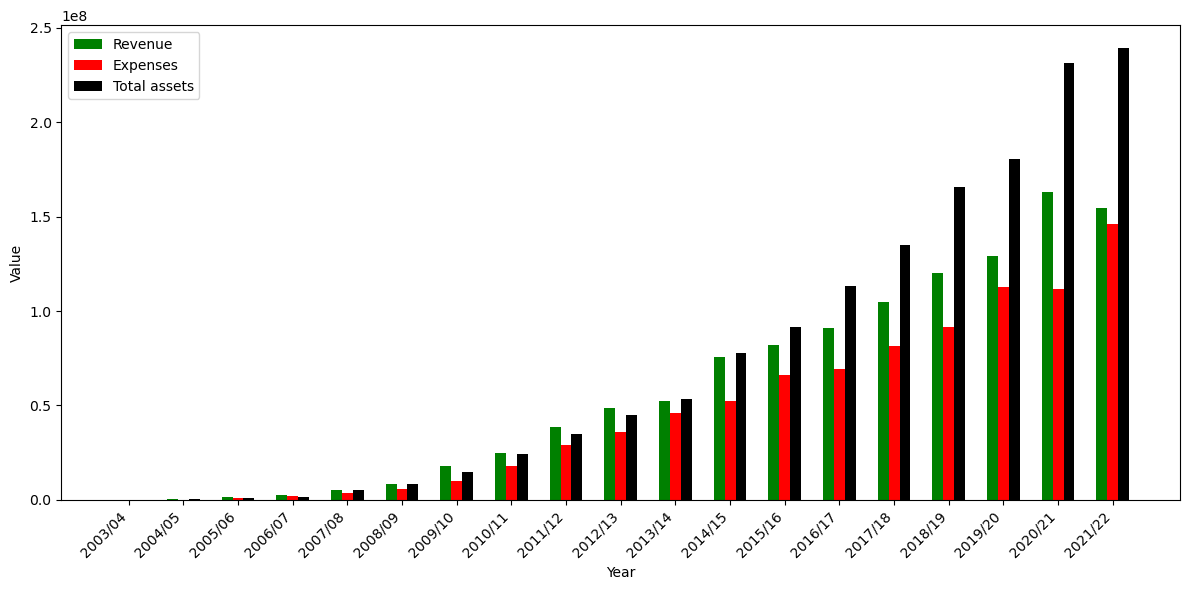

In [18]:
# Sort the DataFrame by the 'Year' column in ascending order
df = df.sort_values(by='Year')

# Create a bar chart with bars next to each other (excluding 'Year' and 'Asset rise' columns)
plt.figure(figsize=(12, 6))
bar_width = 0.2  # Width of each bar
years = df['Year']  # Extract the 'Year' column

colors = {'Revenue': 'green', 'Expenses': 'red', 'Total assets': 'black'}

for i, col in enumerate(['Revenue', 'Expenses', 'Total assets']):
    x = np.arange(len(years))  # Generate x-axis positions for each year
    plt.bar(x + i * bar_width, df[col], width=bar_width, label=col, color=colors[col])

# Set the legend
plt.legend()

# Label the axes
plt.xlabel('Year')
plt.ylabel('Value')

# Set x-axis labels to be the years
plt.xticks(x + bar_width, years, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


#Create additional columns which will help to get a deeper insight into data

In [20]:

# Calculate the growth rate
df['Total Assets Growth Rate'] = df['Total assets'].pct_change() * 100

# Replace the first NaN value (resulting from the percentage change) with 0
df['Total Assets Growth Rate'].fillna(0, inplace=True)

# Print the updated DataFrame
print(df)


       Year    Revenue   Expenses  Asset rise  Total assets  \
18  2003/04      80129      23463       56666         56666   
17  2004/05     379088     177670      211418        268084   
16  2005/06    1508039     791907      736132       1004216   
15  2006/07    2734909    2077843      654066       1658282   
14  2007/08    5032981    3540724     3519886       5178168   
13  2008/09    8658006    5617236     3053599       8231767   
12  2009/10   17979312   10266793     6310964      14542731   
11  2010/11   24785092   17889794     9649413      24192144   
10  2011/12   38479665   29260652    10736914      34929058   
9   2012/13   48635408   35704796    10260066      45189124   
8   2013/14   52465287   45900745     8285897      53475021   
7   2014/15   75797223   52596782    24345277      77820298   
6   2015/16   81862724   65947465    13962497      91782795   
5   2016/17   91242418   69136758    21547402     113330197   
4   2017/18  104505783   81442265    21619373     13494

#Create a line chart showing the trend of Total Assets Growth Rate over the years

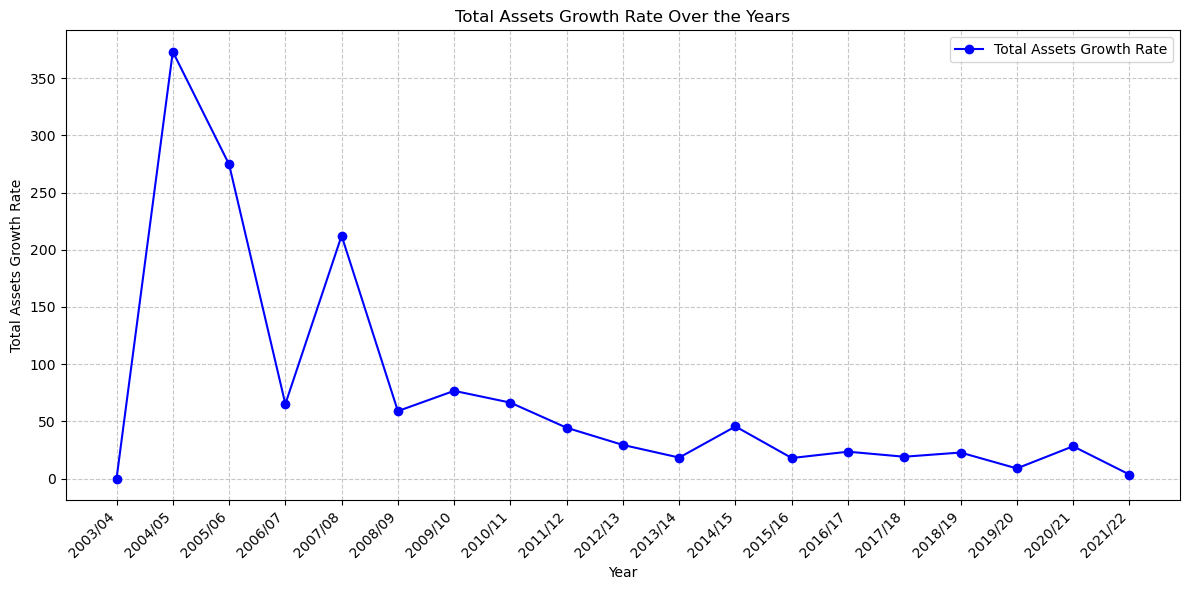

In [21]:


# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Total Assets Growth Rate'], marker='o', linestyle='-', color='b', label='Total Assets Growth Rate')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Total Assets Growth Rate')
plt.title('Total Assets Growth Rate Over the Years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


       Year    Revenue   Expenses  Asset rise  Total assets  \
18  2003/04      80129      23463       56666         56666   
17  2004/05     379088     177670      211418        268084   
16  2005/06    1508039     791907      736132       1004216   
15  2006/07    2734909    2077843      654066       1658282   
14  2007/08    5032981    3540724     3519886       5178168   
13  2008/09    8658006    5617236     3053599       8231767   
12  2009/10   17979312   10266793     6310964      14542731   
11  2010/11   24785092   17889794     9649413      24192144   
10  2011/12   38479665   29260652    10736914      34929058   
9   2012/13   48635408   35704796    10260066      45189124   
8   2013/14   52465287   45900745     8285897      53475021   
7   2014/15   75797223   52596782    24345277      77820298   
6   2015/16   81862724   65947465    13962497      91782795   
5   2016/17   91242418   69136758    21547402     113330197   
4   2017/18  104505783   81442265    21619373     13494

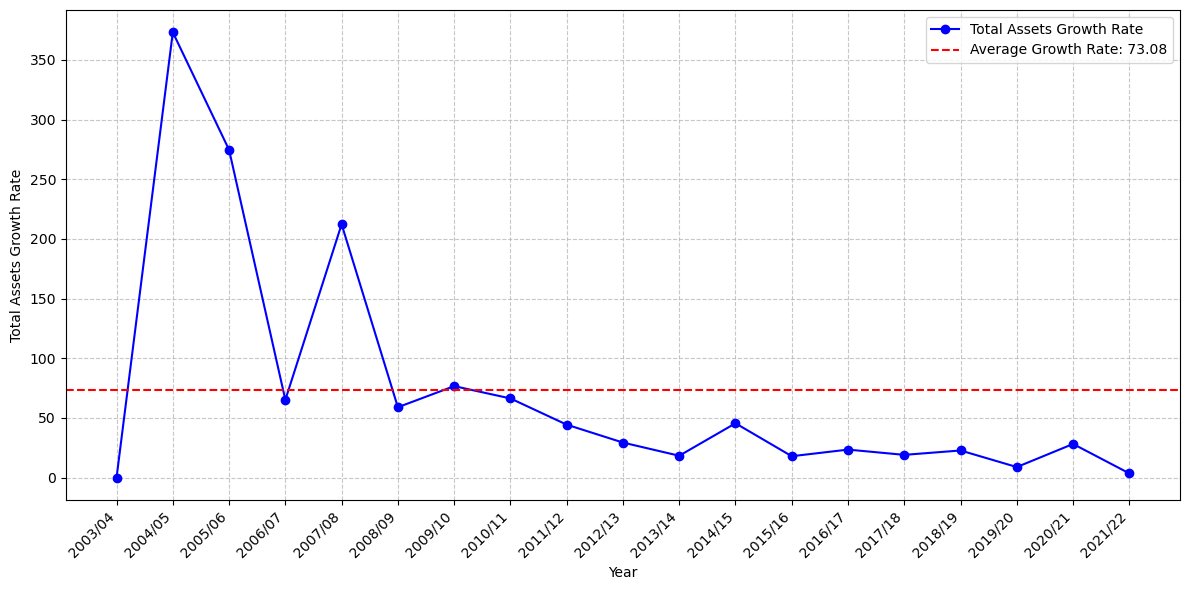

In [24]:


# Calculate the average of the 'Total Assets Growth Rate' column
average_growth_rate = df['Total Assets Growth Rate'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Total Assets Growth Rate'], marker='o', linestyle='-', color='b', label='Total Assets Growth Rate')

# Plot the average line
plt.axhline(average_growth_rate, color='r', linestyle='--', label=f'Average Growth Rate: {average_growth_rate:.2f}')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Total Assets Growth Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
# Calculate the Expense-to-Revenue Ratio
df['Expense-to-Revenue Ratio'] = (df['Expenses'] / df['Revenue']) * 100

# Display the DataFrame with the new column
print(df)

       Year    Revenue   Expenses  Asset rise  Total assets  \
18  2003/04      80129      23463       56666         56666   
17  2004/05     379088     177670      211418        268084   
16  2005/06    1508039     791907      736132       1004216   
15  2006/07    2734909    2077843      654066       1658282   
14  2007/08    5032981    3540724     3519886       5178168   
13  2008/09    8658006    5617236     3053599       8231767   
12  2009/10   17979312   10266793     6310964      14542731   
11  2010/11   24785092   17889794     9649413      24192144   
10  2011/12   38479665   29260652    10736914      34929058   
9   2012/13   48635408   35704796    10260066      45189124   
8   2013/14   52465287   45900745     8285897      53475021   
7   2014/15   75797223   52596782    24345277      77820298   
6   2015/16   81862724   65947465    13962497      91782795   
5   2016/17   91242418   69136758    21547402     113330197   
4   2017/18  104505783   81442265    21619373     13494

In [26]:
# Round values to 2 decimal places for specific columns
df['Total Assets Growth Rate'] = df['Total Assets Growth Rate'].round(2)
df['Expense-to-Revenue Ratio'] = df['Expense-to-Revenue Ratio'].round(2)

# Display the DataFrame with the rounded columns
print(df)


       Year    Revenue   Expenses  Asset rise  Total assets  \
18  2003/04      80129      23463       56666         56666   
17  2004/05     379088     177670      211418        268084   
16  2005/06    1508039     791907      736132       1004216   
15  2006/07    2734909    2077843      654066       1658282   
14  2007/08    5032981    3540724     3519886       5178168   
13  2008/09    8658006    5617236     3053599       8231767   
12  2009/10   17979312   10266793     6310964      14542731   
11  2010/11   24785092   17889794     9649413      24192144   
10  2011/12   38479665   29260652    10736914      34929058   
9   2012/13   48635408   35704796    10260066      45189124   
8   2013/14   52465287   45900745     8285897      53475021   
7   2014/15   75797223   52596782    24345277      77820298   
6   2015/16   81862724   65947465    13962497      91782795   
5   2016/17   91242418   69136758    21547402     113330197   
4   2017/18  104505783   81442265    21619373     13494

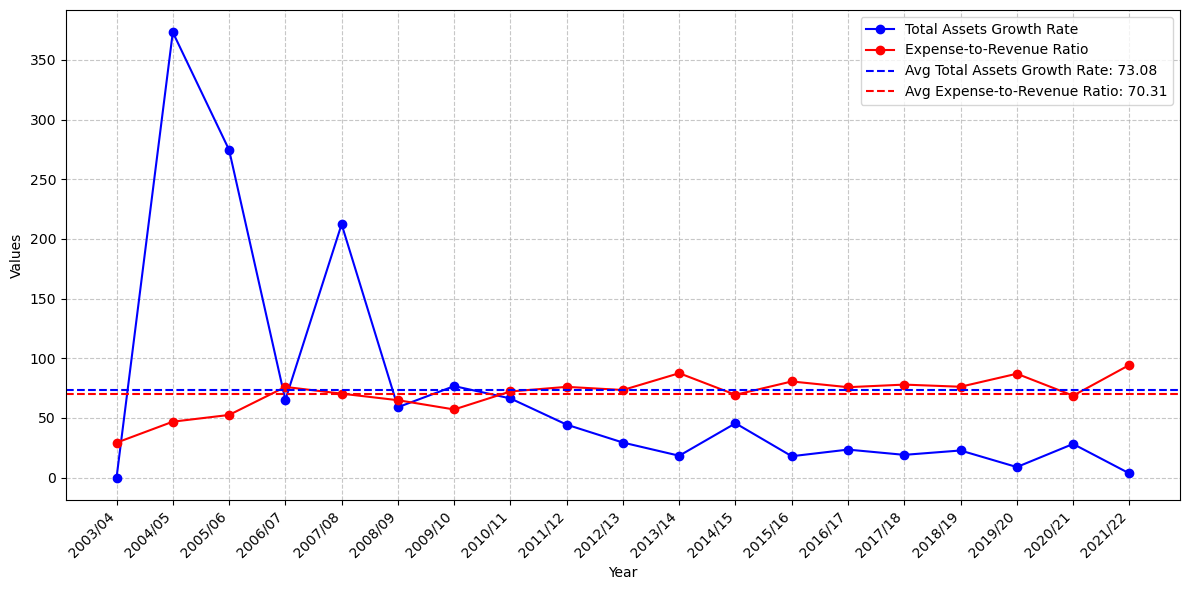

In [27]:
# Calculate the average of the 'Total Assets Growth Rate' column
average_growth_rate = df['Total Assets Growth Rate'].mean()

# Calculate the average of the 'Expense-to-Revenue Ratio' column
average_expense_ratio = df['Expense-to-Revenue Ratio'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Total Assets Growth Rate'], marker='o', linestyle='-', color='b', label='Total Assets Growth Rate')

# Plot the line chart for Expense-to-Revenue Ratio
plt.plot(df['Year'], df['Expense-to-Revenue Ratio'], marker='o', linestyle='-', color='r', label='Expense-to-Revenue Ratio')

# Plot the average line for Total Assets Growth Rate
plt.axhline(average_growth_rate, color='b', linestyle='--', label=f'Avg Total Assets Growth Rate: {average_growth_rate:.2f}')

# Plot the average line for Expense-to-Revenue Ratio
plt.axhline(average_expense_ratio, color='r', linestyle='--', label=f'Avg Expense-to-Revenue Ratio: {average_expense_ratio:.2f}')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


The financial data has been successfully scraped from the Wikipedia page titled "Wikipedia:Fundraising_statistics" using Python. The analysis of this data was carried out to gain insights into the financial situation of the organization. The analysis involved several key steps:

1. Data Cleaning:
   - The data was initially in a tabular format but contained some non-numeric characters. Data cleaning involved removing dollar sign and converting relevant columns (e.g., 'Revenue,' 'Expenses,' 'Asset rise,' 'Total assets') to numeric values.
 
2. New Columns:
   - A new column, 'Total Assets Growth Rate,' was added to calculate the year-over-year percentage growth in total assets.
   - Another new column, 'Expense-to-Revenue Ratio,' was added to assess the ratio of expenses to revenue.

3. Data Visualization:
   - A bar chart was created to visualize the trends in revenue, expenses, and total assets over the years. These bars were plotted separately next to each other, making it easy to compare the values across different years.
   - A line chart was generated to display the 'Total Assets Growth Rate' over time. An average growth rate was added as a horizontal dashed line to highlight trends.
   - An additional line chart was added for the 'Expense-to-Revenue Ratio' with its average line for better insights.

4. Conclusions:
   - The organization has shown steady growth in total assets over the years, with occasional fluctuations.
   - The average growth rate for total assets is approximately 73%, and there is a declining trend in total assets growth from 2009 to 2014. This indicates a period of slower growth during those years.
   - The Expense-to-Revenue Ratio has increased, suggesting an increasing expense burden relative to revenue.
   - The average Expense-to-Revenue Ratio was approximately 70.31%, indicating that expenses consumed about 70.31% of the revenue on average.
   - A sharp decline in the growth rate of total assets was observed in the earlier years (2005-2007), followed by a more stable and increasing trend from 2014 onwards.

These insights were obtained from the analysis of the financial data scraped from Wikipedia. The organization's financial situation seems to have improved over time, as evidenced by increasing total assets. However, the increasing Expense-to-Revenue Ratio may require closer examination to ensure efficient financial management.

Please note that additional insights may be gained with more in-depth analysis or by considering external factors.
